https://github.com/NLP-kr/tensorflow-ml-nlp-tf2.git

In [1]:
import os, sys
current_dir = os.path.dirname(os.path.abspath("module.py"))
sys.path.append(current_dir)
from module import *

In [2]:
model_seq = Sequential(name = 'model_sequential')
model_seq.add(Input(shape=(10,)))
model_seq.add(Dense(64, 'relu'))
model_seq.add(Dropout(0.2))
model_seq.add(Dense(32, 'relu'))
model_seq.add(Dense(10, 'softmax'))
model_seq.summary()

Model: "model_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [3]:
model_seq2 = Sequential([
    Input(shape=(10,)),
    Dense(64, 'relu'),
    Dropout(0.2),
    Dense(32, 'relu'),
    Dense(10, 'softmax')
])
model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


## Functional API

In [4]:
inputs = Input(shape=(10,), name='Inputlayer')
hidden1 = Dense(64, 'relu', name='hidden1')(inputs)
drop_out = Dropout(0.2, name='Dropout')(hidden1)
hidden2 = Dense(32, 'relu', name='hidden2')(drop_out)
outputs = Dense(10, 'softmax', name='output')(hidden2)
model_fun = Model(inputs = inputs, outputs=outputs, name = 'Model_fun')

model_fun.summary()     

Model: "Model_fun"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (InputLayer)     [(None, 10)]              0         
                                                                 
 hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


## Subclassing API

In [6]:
class Model_sub(Model):
    def __init__(self, hidden1, drop_rate, hidden2, outputs):
        super(Model_sub, self).__init__(name = 'Model_sub')
        self.hidden1 = Dense(hidden1, 'relu')
        self.drop_out = Dropout(drop_rate)
        self.hidden2 = Dense(hidden2, 'relu')
        self.outputs = Dense(outputs, 'softmax')

    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.drop_out(x)
        x=  self.hidden2(x)
        x = self.outputs(x)
        
        return x
    
mymodel_sub = Model_sub(64, 0.2, 32, 10)
mymodel_sub.build(input_shape=(1, 10))
mymodel_sub.summary()

Model: "Model_sub"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             multiple                  704       
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_10 (Dense)            multiple                  2080      
                                                                 
 dense_11 (Dense)            multiple                  330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
dataset = np.loadtxt('./data/pima-indians-diabetes.csv', delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [10]:
dataset.shape

(768, 9)

In [11]:
X = dataset[:, :-1]
y = dataset[:, -1]

X.shape

(768, 8)

In [12]:
y.shape

(768,)

## Subclassing

In [14]:
class DM(Model):
    def __init__(self, hidden1, drop_out, hidden2, outputs):
        super(DM, self).__init__()
        self.hidden1 = Dense(hidden1, 'relu')
        self.dropout = Dropout(drop_out)
        self.hidden2 = Dense(hidden2, 'relu')
        self.outputs = Dense(outputs, 'sigmoid')

    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.dropout(x)
        x = self.hidden2(x)
        x = self.outputs(x)

        return x
    
dm_model = DM(64, 0.2, 32, 1)

In [20]:
early_stop = EarlyStopping(patience=30)
check_point = tf.keras.callbacks.ModelCheckpoint('filepath=./model_save/best_model.ckpt',
                                                 save_best_only=True,
                                                 save_weights_only=True)

dm_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc'])

In [21]:
history = dm_model.fit(X, y, validation_split=0.2, epochs=100, batch_size=64,
             callbacks=[early_stop, check_point])

Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 0.6148 - acc: 0.7068 - val_loss: 0.6277 - val_acc: 0.5974
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6245 - acc: 0.6792 - val_loss: 0.6237 - val_acc: 0.6883
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6324 - acc: 0.6840 - val_loss: 0.6248 - val_acc: 0.6818
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6178 - acc: 0.7150 - val_loss: 0.6122 - val_acc: 0.6623
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6182 - acc: 0.7036 - val_loss: 0.6363 - val_acc: 0.6364
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6252 - acc: 0.6922 - val_loss: 0.6204 - val_acc: 0.6558
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6266 - acc: 0.6710 - val_loss: 0.6163 - val_acc: 0.6558
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6309 

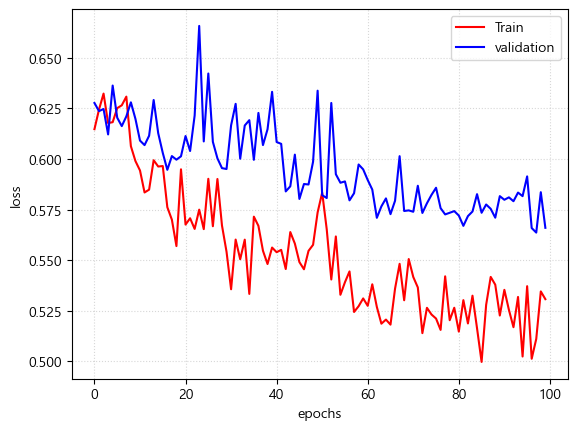

In [22]:
plt.plot(history.history['loss'], c='r', label='Train')
plt.plot(history.history['val_loss'], c='b', label='validation')
plt.legend()
plt.grid(alpha=0.5, linestyle=':')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Sentimental analysis

In [24]:
samples = np.array(['너 오늘 이뻐 보인다.',
           '나는 오늘 기분이 더러워',
           '끝내주는데, 좋은 일이 있나봐',
           '나 좋은 일이 생겼어',
           '아 오늘 진짜 짜증나',
           '환상적인데, 정말 좋은거 같아'])

targets = np.array([[1], [0], [1], [1], [0], [1]])

In [25]:
display(samples)

array(['너 오늘 이뻐 보인다.', '나는 오늘 기분이 더러워', '끝내주는데, 좋은 일이 있나봐', '나 좋은 일이 생겼어',
       '아 오늘 진짜 짜증나', '환상적인데, 정말 좋은거 같아'], dtype='<U16')

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(samples)

print(tokenizer.word_counts)

OrderedDict([('너', 1), ('오늘', 3), ('이뻐', 1), ('보인다', 1), ('나는', 1), ('기분이', 1), ('더러워', 1), ('끝내주는데', 1), ('좋은', 2), ('일이', 2), ('있나봐', 1), ('나', 1), ('생겼어', 1), ('아', 1), ('진짜', 1), ('짜증나', 1), ('환상적인데', 1), ('정말', 1), ('좋은거', 1), ('같아', 1)])


In [33]:
print(tokenizer.word_index)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [35]:
sequence = tokenizer.texts_to_sequences(samples)
input_sequence = np.array(sequence)
display(sequence)

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

## 감성분성

In [30]:
batch_size = 2
num_epochs = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
emb_size = 128
hidden1 = 156
hidden2 = 1

sentiment_model = Sequential()
sentiment_model.add(Input(4, ))
sentiment_model.add(Embedding(vocab_size, emb_size))
sentiment_model.add(tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)))
sentiment_model.add(Dense(hidden1, 'relu'))
sentiment_model.add(Dense(hidden2, 'sigmoid'))

sentiment_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 128)            2688      
                                                                 
 lambda (Lambda)             (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 156)               20124     
                                                                 
 dense_16 (Dense)            (None, 1)                 157       
                                                                 
Total params: 22,969
Trainable params: 22,969
Non-trainable params: 0
_________________________________________________________________


In [46]:
sentiment_model.compile(loss = 'binary_crossentropy',
                        optimizer='adam',
                        metrics=['acc'])
history = sentiment_model.fit(input_sequence, targets, epochs=num_epochs, batch_size=batch_size,)

Epoch 1/100
3/3 [==============================] - 1s 2ms/step - loss: 3.8634e-04 - acc: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 2.4313e-04 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 1.7339e-04 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0303e-04 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 7.8215e-05 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 6.2313e-05 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 4.0593e-05 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 3.3500e-05 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 2.7571e-05 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 2.2629e-05 - acc: 1.0000
Epoch 11/100
3/3 [=====================

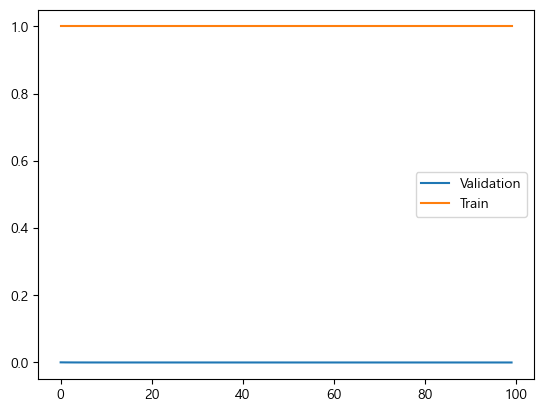

In [48]:
plt.plot(history.history['loss'], label='Validation')
plt.plot(history.history['acc'], label='Train')
plt.legend()
plt.show()

In [50]:
class Sentiment_sub(Model):
    def __init__(self, vocab_size, emb_size, hidden, outputs_node):
        super(Sentiment_sub, self).__init__()
        self.embedding = Embedding(vocab_size, emb_size)
        self.dense = Dense(hidden, 'relu')
        self.outputs = Dense(outputs_node, 'sigmoid')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = tf.reduce_mean(x, axis=1)
        x = self.dense(x)
        x = self.ouputs(x)

        return x
    
sentiment_sub = Sentiment_sub(vocab_size, emb_size, 156, 1)

In [59]:
from sklearn import datasets
import inspect

In [60]:
iris_dataset = sklearn.datasets.load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [61]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [62]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
iris = pd.DataFrame(iris_dataset['data'])
iris['target'] = iris_dataset['target']
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
setosa = iris[iris['class'] == 0]
versicolor = iris[iris['class'] == 1]
virginica = iris[iris['class'] == 2]

setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


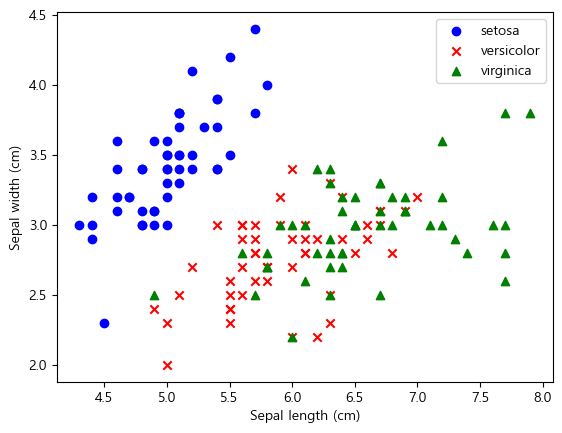

In [68]:
plt.scatter(setosa['sepal_length'], setosa['sepal_width'], marker='o', c='b', label='setosa')
plt.scatter(versicolor['sepal_length'], versicolor['sepal_width'], marker='x', c='r', label='versicolor')
plt.scatter(virginica['sepal_length'], virginica['sepal_width'], marker='^', c='g', label='virginica')

plt.legend()
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()


In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'],
    test_size=0.2
)

In [71]:
ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
params_knn = {'n_neighbors': range(1, 10)}
gs_kun = GridSearchCV(estimator=knn,
                      param_grid=params_knn,
                      scoring='accuracy', cv=5, verbose=1)
